# Organización de Datos 
## Trabajo Práctico número 1 

### Alumnos 

David Leonardo Batallan 

Lucia Lourengo Caridade 

Jimena Roselló 

<br>

---

<br>

## Exploración Inicial 

A lo largo de este trabajo utilizaremos el dataset provisto por la cátedra, el archivo hotel_train.csv. El objetivo del trabajo será lograr predecir si una reserva será cancelada. 
Lo importamos mediante la librería pandas para comenzar a trabajar, y para comenzar a analizar los datos provistos, estudiamos algunas filas del dataset. 



In [ ]:
!pip install -q geopandas
!pip install -q geoplot

import pandas as pd
import statistics as st
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import geopandas
import geoplot

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None) 

df = pd.read_csv("https://drive.google.com/uc?export=download&id=16Ru6_7JIXUpEBKA7j5oFkJqRUXjrYI2Z")
df.head(5)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,115.5,0,1,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,0,BB,PRT,Groups,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,42.0,1,0,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,0,BB,CHE,Online TA,TA/TO,0,0,0,F,F,0,No Deposit,9.0,NaN,0,Transient,229.0,0,2,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,154.0,NaN,0,Transient,75.0,0,0,2016-11-29,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,0,BB,FRA,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,20.0,NaN,0,Transient-Party,75.0,0,1,2017-03-26,28c75445-c603-413a-babf-ad377018b592,0


In [ ]:
df.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date', 'id', 'is_canceled'],
      dtype='object')

El dataset corresponde a un listado de las reservas de 2 hoteles: "City Hotel" y "Resort Hotel". 

In [ ]:
print(df['hotel'].unique())

['City Hotel' 'Resort Hotel']




Cada una de las filas tiene los siguientes datos: 

*   **Adr (average daily rate)**. El costo promedio de una habitación del hotel. Es una variable cuantitativa continua. 

*   **Adults**. La cantidad de adultos que utilizan la reserva. Es una variable cuantitativa discreta. 

*   **Agent**. ID de la agencia de viajes que hizo la reserva. Es una variable cualitativa nominal

*   **Arrival date**. Incluye el año, mes, número de semana y día del mes en que el cliente llega al hotel. Todas ellas son variables cuantitativas discretas.

*   **Assigned room type**. Tipo de habitación asignada. Es una variable cualitativa nominal. 

*   **Babies**. La cantidad de bebés que utilizan la reserva. Es una variable cuantitativa discreta. 

*   **Booking changes**. Cantidad de cambios en la reserva. Es una variable cuantitativa discreta.

*   **Children**. La cantidad de niños que utilizan la reserva. Es una variable cuantitativa discreta. 

*   **Company**. ID de la compañía/entidad responsable de pagar la reserva. Es una variable cualitativa nominal. Tipo de variable????

*   **Country**. El país. Es una variable cualitativa nominal. 

*   **Customer type**. Tipo de cliente. Es una variable cualitativa nominal. 

*   **Days in waiting list**. Cantidad de días que el cliente permanece en lista de espera. Es una variable cuantitativa discreta. 

 
*   **Deposit type**. Tipo de depósito para la seña de la reserva. Es una variable cualitativa nominal. 

*   **Distribution channel**. Es una variable de texto que representa el Canal de distribución de reservas. Es una variable cualitativa nominal. 

*   **Hotel**. El nombre del hotel. Se trata de una variable cualitativa nominal.  

*   **Id**. El ID de la reserva. Es una variable cualitativa nominal. 


*   **Is Canceled**. Indica si la reserva esta cancelada o no. Es una variable cualitativa nominal.

*   **Is repetead guest**. Indica si el cliente ya había realizado reservas anteriormente en el hotel.  Es una variable cualitativa nominal.

*   **Lead time**. Los días de anticipación con los que el cliente reserva una habitación (es decir, el tiempo que transcurre entre la fecha de reservación y la fecha en la que el cliente ingresa al hotel). Es una variable cuantitativa discreta, salvo el mes, que está expresado como variable cualitativa nominal.   

*   **Market segment**. Es una variable de texto que representa la designacion de  agentes de viajes u operadores turisticos. Es una variable cualitativa nominal.

*   **Meal**. Paquetes de comida reservada. Son variables de texto, dado que son siglas correspondientes al tipo de comida que tiene disponible en su paquete. Es una variable cualitativa nominal.


*   **Previous bookings not canceled**. Indica la cantidad de reservas concretadas que el cliente ya tenía previamente. Es una variable cuantitativa discreta. 


*   **Previous cancellations**. Indica cuántas cancelaciones previas ya había tenido el cliente. Es una variable cuantitativa discreta. 


*   **Required car parking spaces**. Cantidad de plazas de estacionamiento que necesita el cliente. Es una variable cuantitativa discreta.  


*   **Reservation status date**. Es la fecha de registro de la reserva. Es una variable cuantitativa discreta.

*   **Reserved room type**. Tipo de habitación reservada. Es una variable cualitativa nominal. 

*   **Stays in weekend nights**. Cantidad de noches de la reserva que corresponden a días del fin de semana. Es una variable cuantitativa discreta. 

*   **Stays in week nights**. Cantidad de noches de la reserva que corresponden a días de la semana. Es una variable cuantitativa discreta. 

*   **Total of special requests**. Cantidad de solicitudes especiales del cliente. Es una variable cuantitativa discreta. 


La salida, is_canceled, es el resultado que queremos predecir. Es un booleano que es 1 si la reserva fue cancelada y 0 si no.  










### Tipos de variable 






#### Variables Cuantitativas
Para las variables cuantitativas del modelo, podemos calcular media, mediana, moda, etc. 
Utilizamos un método auxiliar para calcular y mostrar las medidas: 

In [ ]:
def mostrar_medidas_resumen(columna):
    media = df[columna].mean()
    mediana = st.median(df[columna])
    moda = st.mode(df[columna])
    desviacion = df[columna].std()

    print(f'Medidas de resumen para la variable {columna}:\n\
    \tMedia: {media}\n\
    \tMediana: {mediana}\n\
    \tModa: {moda}\n\
    \tDesviación estándar: {desviacion}')




A continuación analizamos las variables cuantitativas que identificamos anteriormente. 





###### lead_time

In [ ]:
mostrar_medidas_resumen('lead_time')

Medidas de resumen para la variable lead_time:
    	Media: 112.24818697204141
    	Mediana: 78
    	Moda: 0
    	Desviación estándar: 110.71795300478553


###### arrival_date_year

In [ ]:
mostrar_medidas_resumen('arrival_date_year')

Medidas de resumen para la variable arrival_date_year:
    	Media: 2016.1547494064253
    	Mediana: 2016
    	Moda: 2016
    	Desviación estándar: 0.7083887398974893


###### arrival_date_week_number

In [ ]:
mostrar_medidas_resumen('arrival_date_week_number')

Medidas de resumen para la variable arrival_date_week_number:
    	Media: 27.21808020932599
    	Mediana: 28
    	Moda: 33
    	Desviación estándar: 13.52601039171468


###### arrival_date_day_of_month

In [ ]:
mostrar_medidas_resumen('arrival_date_day_of_month')

Medidas de resumen para la variable arrival_date_day_of_month:
    	Media: 15.785812349587324
    	Mediana: 16
    	Moda: 17
    	Desviación estándar: 8.79548857237456


###### stays_in_weekend_nights

In [ ]:
mostrar_medidas_resumen('stays_in_weekend_nights')

Medidas de resumen para la variable stays_in_weekend_nights:
    	Media: 0.9241354804322194
    	Mediana: 1
    	Moda: 0
    	Desviación estándar: 0.9931008320854529


###### stays_in_week_nights

In [ ]:
mostrar_medidas_resumen('stays_in_week_nights')

Medidas de resumen para la variable stays_in_week_nights:
    	Media: 2.5100544312179993
    	Mediana: 2
    	Moda: 2
    	Desviación estándar: 1.88492598623515



###### Adults





In [ ]:
mostrar_medidas_resumen('adults')

Medidas de resumen para la variable adults:
    	Media: 1.862791336229871
    	Mediana: 2
    	Moda: 2
    	Desviación estándar: 0.5890663515933875


###### children

In [ ]:
mostrar_medidas_resumen('children')

Medidas de resumen para la variable children:
    	Media: 0.10489589558868662
    	Mediana: 0.0
    	Moda: 0.0
    	Desviación estándar: 0.4028474531690174


###### babies

In [ ]:
mostrar_medidas_resumen('babies')

Medidas de resumen para la variable babies:
    	Media: 0.007155201653933746
    	Mediana: 0
    	Moda: 0
    	Desviación estándar: 0.09215849305350782


###### previous_cancellations

In [ ]:
mostrar_medidas_resumen('previous_cancellations')

Medidas de resumen para la variable previous_cancellations:
    	Media: 0.11479010870091903
    	Mediana: 0
    	Moda: 0
    	Desviación estándar: 0.993722923342379


###### previous_bookings_not_canceled

In [ ]:
mostrar_medidas_resumen('previous_bookings_not_canceled')

Medidas de resumen para la variable previous_bookings_not_canceled:
    	Media: 0.11542002487361297
    	Mediana: 0
    	Moda: 0
    	Desviación estándar: 1.3963592787684405


###### booking_changes

In [ ]:
mostrar_medidas_resumen('booking_changes')

Medidas de resumen para la variable booking_changes:
    	Media: 0.19595238479802304
    	Mediana: 0
    	Moda: 0
    	Desviación estándar: 0.6105194279379025


###### days_in_waiting_list

In [ ]:
mostrar_medidas_resumen('days_in_waiting_list')

Medidas de resumen para la variable days_in_waiting_list:
    	Media: 2.6389772745626927
    	Mediana: 0
    	Moda: 0
    	Desviación estándar: 18.619092452663697


###### adr

In [ ]:
mostrar_medidas_resumen('adr')

Medidas de resumen para la variable adr:
    	Media: 102.38377303635745
    	Mediana: 95.0
    	Moda: 62.0
    	Desviación estándar: 47.75763998549094


###### required_car_parking_spaces

In [ ]:
mostrar_medidas_resumen('required_car_parking_spaces')

Medidas de resumen para la variable required_car_parking_spaces:
    	Media: 0.04995719800365028
    	Mediana: 0
    	Moda: 0
    	Desviación estándar: 0.22102332755189846


###### reservation_status_date

In [ ]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], infer_datetime_format=True)
mostrar_medidas_resumen('reservation_status_date')

Medidas de resumen para la variable reservation_status_date:
    	Media: 2016-07-18 03:11:41.765380352
    	Mediana: 2016-07-24 00:00:00
    	Moda: 2015-10-21 00:00:00
    	Desviación estándar: 230 days 14:29:51.156111756


###### total_of_special_requests

In [ ]:
mostrar_medidas_resumen('total_of_special_requests')

Medidas de resumen para la variable total_of_special_requests:
    	Media: 0.5237026149597015
    	Mediana: 0
    	Moda: 0
    	Desviación estándar: 0.7754122489220224


In [ ]:
df.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
count,61913.000000,61913.000000,61913.00000,61913.000000,61913.000000,61913.000000,61913.000000,61909.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,54023.000000,3152.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000
mean,112.248187,2016.154749,27.21808,15.785812,0.924135,2.510054,1.862791,0.104896,0.007155,0.027991,0.114790,0.115420,0.195952,84.541010,188.539340,2.638977,102.383773,0.049957,0.523703,0.499750
std,110.717953,0.708389,13.52601,8.795489,0.993101,1.884926,0.589066,0.402847,0.092158,0.164948,0.993723,1.396359,0.610519,109.523772,129.457025,18.619092,47.757640,0.221023,0.775412,0.500004
min,0.000000,2015.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,23.000000,2016.000000,16.00000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,67.000000,0.000000,70.000000,0.000000,0.000000,0.000000
50%,78.000000,2016.000000,28.00000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,179.000000,0.000000,95.000000,0.000000,0.000000,0.000000
75%,172.000000,2017.000000,38.00000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,208.000000,270.000000,0.000000,126.000000,0.000000,1.000000,1.000000
max,629.000000,2017.000000,53.00000,31.000000,16.000000,40.000000,55.000000,10.000000,9.000000,1.000000,26.000000,70.000000,17.000000,535.000000,543.000000,391.000000,510.000000,8.000000,5.000000,1.000000





#### Variables Cualitativas
A continuación analizamos las variables cualitativas que identificamos anteriormente, estudiando los posibles valores que toman y cuan frecuentemente lo hacen. 




###### hotel 

Como habíamos visto anteriormente, los dos valores que se presentan de la variable hotel son City Hotel y Resort Hotel. Vemos que en tenemos datos de City Hotel en mayor proporción que datos de Resort Hotel

City Hotel      42129
Resort Hotel    19784
Name: hotel, dtype: int64


<Axes: title={'center': 'Reservas por hotel'}, xlabel='Hotel', ylabel='Cantidad de visitas'>

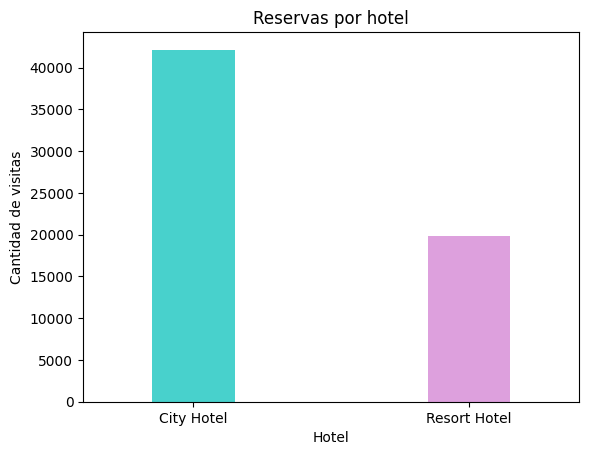

In [ ]:
print(df['hotel'].sort_values().value_counts())

df['hotel'].sort_values().value_counts().plot(kind = 'bar', width = 0.3, rot = 0, color=['mediumturquoise', 'plum'], title='Reservas por hotel', xlabel='Hotel', ylabel='Cantidad de visitas')

###### arrival_date_month

En este caso, los posibles valores son los 12 meses del año. Vemos que Agosto es el mes con más visitas, y Enero el mes con menos visitas.  

August       7176
July         6524
May          6159
April        5878
October      5863
June         5772
September    5619
March        4899
February     4125
December     3493
November     3404
January      3001
Name: arrival_date_month, dtype: int64


<Axes: title={'center': 'Reservas por mes'}, xlabel='Cantidad de visitas', ylabel='Mes'>

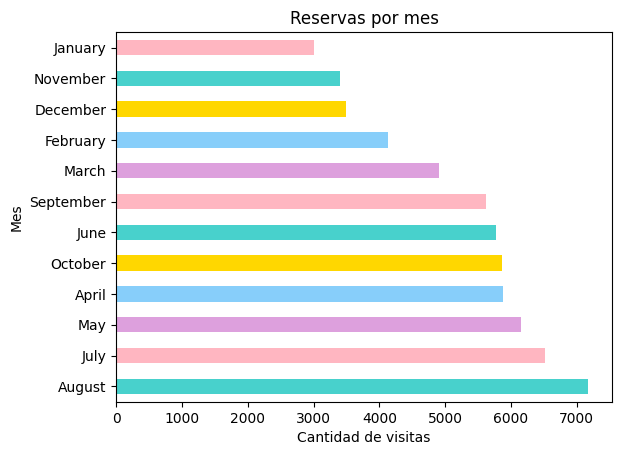

In [ ]:
print(df['arrival_date_month'].sort_values().value_counts())

df['arrival_date_month'].sort_values().value_counts().plot(kind = 'barh', rot = 0, color=['mediumturquoise', 'lightpink', 'plum', 'lightskyblue', 'gold'], title='Reservas por mes', xlabel='Cantidad de visitas', ylabel='Mes')


###### country

Vemos que la mayoría de las visitas son de Portugal, y la minoria son de Fiji y otros países. 

In [ ]:
print(df['country'].sort_values().value_counts())

world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)

world = pd.merge(
    left=world, 
    right=df,
    left_on='iso_a3',
    right_on='country',
    how='outer'
)

world.geometry.geom_type.value_counts()

ax=world.boundary.plot(linewidth=0.2, figsize=(18, 14))
ax.set_axis_off()
world.plot(cmap='PuBu', ax=ax, column='country', missing_kwds={
        "color": "lightgrey",
        "edgecolor": "white",
        "hatch": "/////",
        "label": "",
    },
)

PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
       ...  
MWI        1
JAM        1
MDG        1
MCO        1
FJI        1
Name: country, Length: 149, dtype: int64



###### reserved_room_type y assigned_room_type

El tipo de habitación más solicitada es el "A" por amplia mayoría, y el menos solicitado es el "L". 
El tipo de habitación más asignado es el "A" y el menos asignado es el "K". 

In [ ]:
print(df['reserved_room_type'].sort_values().value_counts())
print(df['assigned_room_type'].sort_values().value_counts())

Comparando los valores en un gráfico, observamos que hay una leve diferencia entre la cantidad de habitaciones de un tipo reservadas y asignadas:  

In [ ]:
reserved = df['reserved_room_type'].sort_values().value_counts(dropna="false")
assigned = df['assigned_room_type'].sort_values().value_counts(dropna="false")
groups = np.unique(np.concatenate((assigned.index.tolist(), reserved.index.tolist()), 0))

for group in groups:
  if group not in reserved.index.tolist():
    reserved.add(0)
  if group not in assigned.index.tolist():
    assigned.add(0)

auxDf = pd.DataFrame({
    "Tipos de habitación": groups, 
    "assigned_room_type": assigned, 
    "reserved_room_type": reserved
})

auxDf.plot(x='Tipos de habitación', ylabel='Cantidad', y=['assigned_room_type', 'reserved_room_type'], 
           kind='bar', width=0.9, rot=0, figsize=(11,7), 
           title='Habitaciones reservadas vs. asignadas', color=['mediumturquoise', 'plum'])


###### deposit_type 

La mayoría de los clientes eligen reservar sin depósito, seguidos por las reservas sin reembolso y minoritariamente por clientes que eligen reservas reembolsables. 

In [ ]:
print(df['deposit_type'].sort_values().value_counts())

plt.pie(df['deposit_type'].sort_values().value_counts(), colors=['mediumturquoise', 'lightpink', 'blue'], labels = df['deposit_type'].sort_values().value_counts().index.tolist())
plt.title('Cantidad de reservas por tipo de depósito')

plt.show()

###### agent

La mayoría de las reservas provienen de la agencia con id 9, seguidos por las de id 240 y luego por las de id 1. Hay varias agencias que tuvieron una única reserva. 
Observamos en el gráfico que un tercio de las reservas fueron hechas por agencias de viajes con menos de 900 reservas en total, un tercio por la agencia de id 9, y el tercio restante por otras agencias. 

In [ ]:
print(df['agent'].sort_values().value_counts())

agent = df['agent'].sort_values().value_counts()
print(agent)

significativas = agent[agent > 900]
otras = agent[agent <= 900]

df_agent_signi = pd.DataFrame(data = {
    'agent': significativas.index.tolist(),
    'cantidad': significativas.tolist()
})
df_agent_otros = pd.DataFrame(data = {
    'agent' : ['otras'],
    'cantidad': otras.sum()
})

df_agent_grafico = pd.concat([df_agent_signi, df_agent_otros])

plt.pie(df_agent_grafico['cantidad'], 
        colors=['mediumturquoise', 'lightpink', 'plum', 'lightskyblue', 'gold'], 
        labels = df_agent_grafico['agent'])
plt.title('Cantidad de reservas por agente')

plt.show()


###### company 

Los id de compañía se encuentran distribuidos como vemos a continuación. La mayoría de las reservas están a cargo de la compañía con ID 40, seguida por la compañía con id 223. Hay muchas compañías que estuvieron a cargo de una única reserva. 
Podemos observar en el gráfico que aproximadamente la mitad de las reservas fueron hechas a través de compañías que tuvieron menos de 50 reservas en total. 

In [ ]:
company = df['company'].sort_values().value_counts()
print(company)

significativas = company[company > 50]
otras = company[company <= 50]

df_company_signi = pd.DataFrame(data = {
    'company': significativas.index.tolist(),
    'cantidad': significativas.tolist()
})
df_company_otros = pd.DataFrame(data = {
    'company' : ['otras'],
    'cantidad': otras.sum()
})

df_company_grafico = pd.concat([df_company_signi, df_company_otros])

plt.pie(df_company_grafico['cantidad'], 
        colors=['mediumturquoise', 'lightpink', 'plum', 'lightskyblue', 'gold'], 
        labels = df_company_grafico['company'])
plt.title('Cantidad de reservas por compañia')

plt.show()

###### customer_type 

La mayoría de las reservas son individuales y cortas (transient), seguidas por transitorias asociadas a otras (transient-party), luego por reservas con contratos asociados (contract) y finalmente reservas asociadas a grupos (group). 

In [ ]:
print(df['customer_type'].sort_values().value_counts())

plt.pie(df['customer_type'].sort_values().value_counts(), 
        colors=['mediumturquoise', 'lightpink', 'plum', 'lightskyblue', 'gold'], 
        labels = df['customer_type'].sort_values().value_counts().index.tolist())
plt.title('Cantidad de reservas por customer type')

plt.show()

###### id

La variable que identifica a las reservas es única, por lo tanto hay una sola repetición de cada valor, y cada reserva tiene un id no nulo. 

###### distribution_channel
 Se observa que la mayoria son  TA (Travel Agents) o TO (Tour Operators), seguidos por Direct y Corporate y en menor medida por GDS y no definidos.

In [ ]:
print(df['distribution_channel'].sort_values().value_counts())
frecuencia = df['distribution_channel'].sort_values().value_counts().plot(kind = 'bar', width = 0.4, rot = 0, color=['mediumturquoise'],title="Gráfico de frecuencias de valores posibles de distribution_channel ", xlabel= 'distribution_channel',ylabel="Frecuencia")

###### is_canceled
Observamos que la frecuencia es casi idéntica entre las reservas que fueron canceladas(1) y las que no(0).

In [ ]:
print(df['is_canceled'].sort_values().value_counts())
frecuencia = df['is_canceled'].sort_values().value_counts().plot(kind = 'bar', width = 0.4, rot = 0, color=['mediumturquoise'],title="Gráfico de frecuencias de valores posibles de is_canceled ", xlabel= 'is_canceled',ylabel="Frecuencia")

###### is_repeated_guest

Observamos que son más frecuentes los huéspedes nuevos(0) que los que ya habían estado en el hotel con anterioridad(1).

In [ ]:
print(df['is_repeated_guest'].sort_values().value_counts())
frecuencia = df['is_repeated_guest'].sort_values().value_counts().plot(kind = 'bar', width = 0.4, rot = 0, color=['mediumturquoise'],title="Gráfico de frecuencias de valores posibles de is_repeated_guest ", xlabel= 'is_repeated_guest',ylabel="Frecuencia")

###### market_segment

Observamos que el intermediario más elegido es Online TA, seguido por Offline TA/TO y Groups, con aproximadamente la mitad de la frecuncia del primero. Luego le siguen Direct, Corporate, Complementary y Aviation.
Referencias:

“TA” = “Travel Agents” 
“TO” = “Tour Operators”

In [ ]:
print(df['market_segment'].sort_values().value_counts())
frecuencia = df['market_segment'].sort_values().value_counts().plot(kind = 'bar', width = 0.4,figsize=(10, 5), rot = 0, color=['mediumturquoise'],title="Gráfico de frecuencias de valores posibles de market_segment ", xlabel= 'market_segment',ylabel="Frecuencia")

###### meal

Observamos que, con amplia diferencia, el paquete más pedido es BB(cama y desayuno), seguido por HB(desayuno y otra comida),SC y Undefined (sin paquete), y por ultimo, FB (desayuno, almuerzo y cena).

In [ ]:
print(df['meal'].sort_values().value_counts())
frecuencia = df['meal'].sort_values().value_counts().plot(kind = 'bar', width = 0.4, rot = 0, color=['mediumturquoise'],title="Gráfico de frecuencias de valores posibles de meal ", xlabel= 'meal',ylabel="Frecuencia")

### Variables irrelevantes 
Para el análisis no vamos a considerar las siguientes columnas:
* id - no aporta información relevante al análisis porque solo sirve para identificar las reservas. 
* reservation_status_date - no aporta información extra respecto de las variables de de fecha ya analizadas, por lo que no la consideramos relevante. 
* company - debido al alto porcentaje de datos faltantes (aproximadamente 94%) no es una variable que impacte en la predicción de cancelación de reservas, o bien el dataset con el que estamos trabajando es inválido. 



### Análisis gráfico 
Analizaremos las distribuciones de las variables cuantitativas de nuestro dataset mediante el uso de histogramas.


###### lead_time

In [ ]:

fig, ax=plt.subplots(figsize=(10,7))
ax = sns.histplot(df,x= 'lead_time', bins=30)
plt.xlabel('Dias previos a la reserva',fontsize = 10)
plt.ylabel('Frecuencia')
plt.title('Distribucion de la variable lead_time')
plt.show()

###### arrival_date_year

In [ ]:
fig, ax=plt.subplots(figsize=(5,7))
ax = sns.histplot(df,x= 'arrival_date_year', bins=12)
ax.set(xticks=list(range(2015,2018)))
plt.xlabel('Año de la reserva',fontsize = 10)
plt.ylabel('Frecuencia')
plt.title('Distribucion de la variable arrival_date_year')
plt.show()

###### arrival_date_week_number

In [ ]:
fig, ax=plt.subplots(figsize=(14,7))
ax = sns.histplot(df,x= 'arrival_date_week_number', bins=30)
ax.set(xticks=(range(54)))
plt.xlabel('Numero de semana',fontsize = 10)
plt.ylabel('Frecuencia')
plt.title('Distribucion de la variable arrival_date_week_number')
plt.show()

###### arrival_date_day_of_month

In [ ]:
fig, ax=plt.subplots(figsize=(10,5))
ax = sns.histplot(df,x= 'arrival_date_day_of_month', bins=30)
ax.set(xticks=(range(0,32)))
plt.xlabel('Dia del mes')
plt.ylabel('Frecuencia')
plt.title('Distribucion de la variable arrival_date_day_of_month')
plt.show()

###### stays_in_weekend_nights

In [ ]:
fig, ax=plt.subplots(figsize=(8,8))
ax = sns.histplot(df,x= 'stays_in_weekend_nights', bins=32)
ax.set(xticks=(range(0,17)))
plt.xlabel('Noches de fin de semana reservadas ')
plt.ylabel('Frecuencia')
plt.title('Distribucion de la variable stays_in_weekend_nights')
plt.show()

###### stays_in_week_nights

In [ ]:
fig, ax=plt.subplots(figsize=(10,5))
ax = sns.histplot(df,x= 'stays_in_week_nights', bins=40)
ax.set(xticks=(range(0,41)))
plt.xlabel('Noches de la semana reservadas ')
plt.ylabel('Frecuencia')
plt.title('Distribucion de la variable stays_in_week_nights')
plt.show()

###### Adults

In [ ]:
fig, ax=plt.subplots(figsize=(10,5))
ax = sns.histplot(df,x= 'adults', bins=55)
ax.set(xticks=(range(0,56,2)))
plt.xlabel('Cantidad de adultos por reserva')
plt.ylabel('Frecuencia')
plt.title('Distribucion de la variable adults')
plt.show()

###### children


In [ ]:
fig, ax=plt.subplots(figsize=(10,5))
ax = sns.histplot(df,x= 'children', bins=10)
ax.set(xticks=(range(0,11)))
plt.xlabel('Cantidad de chicos por reserva')
plt.ylabel('Frecuencia')
plt.title('Distribucion de la variable children')
plt.show()

###### babies

In [ ]:
fig, ax=plt.subplots(figsize=(10,5))
ax = sns.histplot(df,x= 'babies', bins=9)
ax.set(xticks=(range(0,10)))
plt.xlabel('Cantidad de bebes por reserva')
plt.ylabel('Frecuencia')
plt.title('Distribucion de la variable babies')
plt.show()

###### previous_cancellations

In [ ]:
fig, ax=plt.subplots(figsize=(10,5))
ax = sns.histplot(df,x= 'previous_cancellations', bins=30)
ax.set(xticks=(range(0,31)))
plt.xlabel('Cantidad de dias previos en que se cancela una reserva')
plt.ylabel('Frecuencia')
plt.title('Distribucion de la variable previous_cancellations')
plt.show()


###### previous_bookings_not_canceled

In [ ]:
fig, ax=plt.subplots(figsize=(10,5))
ax = sns.histplot(df,x= 'previous_bookings_not_canceled', bins=10)
plt.xlabel('Cantidad de reservas cumplidas por cliente')
plt.ylabel('Frecuencia')
plt.title('Distribucion de la variable previous_bookings_not_canceled')
plt.show()

###### booking_changes

In [ ]:

fig, ax=plt.subplots(figsize=(10,5))
ax = sns.histplot(df,x= 'booking_changes', bins=17)
ax.set(xticks=list(range(0,18)))
plt.xlabel('Cantidad de cambios realizados por reserva')
plt.ylabel('Frecuencia')
plt.title('Distribucion de la variable booking_changes')
plt.show()

###### days_in_waiting_list

In [ ]:
fig, ax=plt.subplots(figsize=(10,5))
ax = sns.histplot(df,x= 'days_in_waiting_list', bins=15)
ax.set(xticks=list(range(0,400,50)))
plt.xlabel('Cantidad de dias en lista de espera')
plt.ylabel('Frecuencia')
plt.title('Distribucion de la variable days_in_waiting_list')
plt.show()

###### adr

In [ ]:
fig, ax=plt.subplots(figsize=(10,5))
ax = sns.histplot(df,x= 'adr', bins=50)
ax.set(xticks=list(range(0,520,50)))
plt.xlabel('Costo promedio de una habitacion')
plt.ylabel('Frecuencia')
plt.title('Distribucion de la variable adr')
plt.show()

###### required_car_parking_spaces

In [ ]:
print(df['required_car_parking_spaces'].min())
print(df['required_car_parking_spaces'].max())
fig, ax=plt.subplots(figsize=(10,5))
ax = sns.histplot(df,x= 'required_car_parking_spaces', bins=8)
ax.set(xticks=list(range(0,10)))
plt.xlabel('Cantidad de espacios necesarios para estacionar')
plt.ylabel('Frecuencia')
plt.title('Distribucion de la variable required_car_parking_spaces')
plt.show()

###### total_of_special_requests

In [ ]:
fig, ax=plt.subplots(figsize=(10,5))
ax = sns.histplot(df,x= 'total_of_special_requests', bins=5)
plt.xlabel('Cantidad de solicitudes especiales por cliente')
plt.ylabel('Frecuencia')
plt.title('Distribucion de la variable total_of_special_requests')
plt.show()

### Correlaciones 

A continuación estudiamos algunas correlaciones existentes entre las variables. 


In [ ]:
matriz_correlacion=df.corr()
matriz_correlacion

## Visualización de los datos

A continuación trabajaremos con un heatmap para entender mejor la relación entre las variables y el target. 



In [ ]:
plt.figure(figsize = (16,9))
ax = plt.axes()
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')
ax.set_title('Gráfico de la matriz de correlación', fontsize =20)
plt.show()


Entre las variables cuantitativas, vemos que las que mayor correlación mantienen con el target (is_canceled) son lead_time, total_of_special_requests y required_car_parking_spaces. 

In [ ]:
df2 = df[['lead_time',
          'arrival_date_year',
          'arrival_date_week_number',
          'stays_in_weekend_nights',
          'stays_in_week_nights',
          'children',
          'previous_bookings_not_canceled',
          'agent',
          'company',
          'adr',
          'is_canceled']] 
df2

In [ ]:

plt.figure(figsize = (21,9))
sns.pairplot(df2,vars=df2.columns[:-1],hue='is_canceled',corner=True)
plt.show()


### Relación de las variables con el target 

Estudiaremos la relación entre las variables analizadas y el target del análisis, es decir, is_canceled. 

Anteriormente vimos que la variable cualitativa con mayor relación con el target es lead_time, seguida en menor medida por total_of_special_requests y required_car_parking_spaces. 

In [ ]:
df.plot.scatter(x='lead_time', y='is_canceled', s=10).set(title="Dispersograma is_canceled y lead_time",xlabel='lead_time',ylabel='is_canceled') 

Vemos que si bien se encuentran parejas las cancelaciones y no cancelaciones para los valores de lead_time entre 0 y 400 aproximadamente, a partir de este último valor en adelante la mayoría de las reservas fueron canceladas. 
Esto nos permite intuir que cuanto mayor sea la anticipación con la que se efectúa la reserva, mayor es la probabilidad de que esta sea cancelada. 
De 550 aproximadamente en adelante, todas las reservas efectuadas fueron canceladas. 

## Datos Faltantes 
A continuacion analizaremos la presencia de datos faltantes para cada columna en el dataset. 



In [ ]:
cantidad = df.isnull().sum()
porcentaje = df.isnull().sum() * 100 / len(df.index)

df_faltantes = pd.DataFrame({'Cantidad faltantes' : cantidad, 'Porcentaje faltantes' : porcentaje})
df_faltantes_filtrado = df_faltantes[df_faltantes['Cantidad faltantes'] > 0]
df_faltantes_filtrado.head()

Observamos que hay 4 columnas con datos faltantes: 
* la cantidad de niños, con un 0.06% de faltantes respecto al largo total del dataset
* el país, con un 0.36% de faltantes respecto al largo total del dataset
* el agente, con un 12.74% de faltantes respecto al largo total del dataset
* la compañía, con un 94.91% de faltantes respecto al largo total del dataset

El resto tienen un 0% de faltantes, por lo que decidimos filtrarlos en la tabla.

A continuación graficamos la totalidad de los campos con sus respectivas proporciones de datos faltantes:

In [ ]:
grafico_faltantes = sns.displot(
    data=df.isnull().melt(value_name="Faltantes"), 
    palette=['mediumturquoise', 'plum'],
    y="variable",
    hue="Faltantes",
    multiple="fill",
    height=7,
    aspect=1.5
)

grafico_faltantes.set_axis_labels("Proporción", "Variable")
plt.show()

Analizamos cómo proceder para cada caso: 



###### country y children

Debido al bajo porcentaje de datos faltantes (0.36% y 0.06%) y sumado en el caso del país a la gran diversidad de valores posibles para esta variable, decidimos anular los registros repetidos. 

In [ ]:
df['country'].unique()

###### agent y company 

La variable company, que tiene un alto porcentaje de datos faltantes (más del 95%), nos resulta irrelevante para este problema, porque cualquier información que pueda proporcionar no debe afectar al objetivo de predecir si una reserva será cancelada (o bien, si efectivamente lo afecta, nuestro dataset no será útil porque no proporciona información suficiente de esta variable para analizar). Por lo tanto, la omitimos en el análisis. 
Lo mismo ocurre con la variable agent, que si bien tiene un porcentaje relativamente bajo de datos faltantes (aproximadamente 12%), consideramos que tampoco afectará nuestro análisis. 


In [ ]:
df_sin_faltantes = df[['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests']].dropna()

Habiendo descartado el porcentaje de las filas con datos de país y niños faltantes, y habiendo anulado las columnas agent y company (datos irrelevantes) tenemos disponibilidad total de los datos sin valores nulos. 

## Valores atípicos 


Intentaremos detectar valores atípicos en los datos en forma univariada y multivariada.
Para ello estudiaremos cómo se encuentran distribuidos los datos y trataremos de encontrar los que se alejan de la distribución esperada. 



In [ ]:
df_sin_faltantes.agg(['min','max'])

In [ ]:
df_sin_faltantes.quantile(np.arange(0.00,1.01,0.01))

A simple vista, en la tabla anterior vemos que hay un valor de adr (average daily rate) negativo (-6.38) y uno nulo. Estos valores no son los esperados para el costo de una habitación. 

Por otro lado, vemos que hay varias filas donde las variables stays_in_weekend_nights y stays_in_week_nights son ambas nulas. Es decir, que hubo reservas de 0 noches. Estos valores no parecen ser los esperados. 

Las variables previous_cancellations, previous_bookings_not_canceled, booking_changes, y required_parking_spaces tienen una fila con valores muy superiores a las anteriores (26, 70, 17 y 8 respectivamente). 

Diagramaremos con boxplot para detectar los outliers. 

In [ ]:
df_sin_faltantes[['stays_in_weekend_nights', 'stays_in_week_nights']].plot.box(title="Noches de estadía")

In [ ]:
max_stays_in_weekend = df_sin_faltantes[df_sin_faltantes['stays_in_weekend_nights'] > 5].index
print(max_stays_in_weekend)


In [ ]:
df_sin_faltantes[['adr']].plot.box(title="Average daily rate")

In [ ]:
max_adr = df_sin_faltantes[df_sin_faltantes['adr'] > 200].index
print(max_adr)

In [ ]:
df_sin_faltantes[['previous_cancellations', 'previous_bookings_not_canceled']].plot.box(title="Reservas anteriores") 

In [ ]:
max_previous_cancellations = df_sin_faltantes[df_sin_faltantes['previous_cancellations'] > 0].index
print(max_previous_cancellations)


In [ ]:
df[['booking_changes']].plot.box(title="Cambios de reserva")

In [ ]:
max_booking_changes = df_sin_faltantes[df_sin_faltantes['booking_changes'] > 2].index  
print(max_booking_changes)

In [ ]:
df_sin_faltantes[['required_car_parking_spaces']].plot.box(title="Plazas de estacionamiento requeridas")

In [ ]:
max_required_car_parking_spaces = df_sin_faltantes[df_sin_faltantes['required_car_parking_spaces'] > 2].index
print(max_required_car_parking_spaces)

Detectamos algunos casos con valores no esperados (reservas y cancelaciones anteriores con valores muy altos, entre 10 y 70 por cliente), cambios de reserva mayores a 2, y el uso de 8 plazas de estacionamiento). Para este último caso, podríamos optar por eliminar la fila atípica porque es un único valor. En los demás casos, como se trata de un volumen bastante importante de datos con valor atípico, consideramos que borrarlos no es lo mejor ya que estaríamos eliminando información, por lo que deberemos tener en cuenta estos valores durante el análisis.